## Neural Networks

In this part of the exercise, a neural network is employed to recognize handwritten digits using the same training set as before.  The neural network will be able to represent complex models that form non-linear hypotheses. Parameters from a neural network that we  have  already  trained is used for this excersise.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy.optimize as opt
import scipy.io as from_octave # used to implement mat file type
import random as rd
import matplotlib.cm as cm # used to display images in a specific colormap
from scipy.misc import toimage # used to convert matrix to image
# Update the matplotlib configuration parameters: 
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'ubuntu'})
% matplotlib inline

## Convert .mat file and prepare data

In [2]:
# Load training data
directory = os.getcwd() + '/ex3data1.mat'
data = from_octave.loadmat(directory)
y = np.array(data['y'],dtype='float')
X = np.array(data['X'],dtype='float')

# setup sime parameters used for the specific excersise
input_layer_size  = 400  # 20x20 Input Images of Digits
num_labels = 10          # 10 labels, from 1 to 10 (for octave) 10 is actually 0
m,n = X.shape 

y.shape, X.shape , np.unique(y)

((5000, 1),
 (5000, 400),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]))

In [3]:
# load trained weights
directory = os.getcwd() + '/ex3weights.mat'
theta_mat = from_octave.loadmat(directory)
theta1 =  theta_mat["Theta1"]
theta2 =  theta_mat["Theta2"]

## Feedforward Propagation and Prediction

In [4]:
def sigmoid(x):
    '''
    J = SIGMOID(z) computes the sigmoid of z.
    '''    
    return 1/(1+np.exp(-x))

def predict(theta1,theta2,X):    
    '''
    #p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the
    #trained weights of a neural network (Theta1, Theta2)
    '''    
    z2 = X.dot(theta1.T)
    a2 = sigmoid(z2)
    a2_b = np.insert(a2, 0, 1,axis=1)
    z2 = a2_b.dot(theta2.T)
    a3 = sigmoid(z2)
    pred = (np.argmax(a3,axis=1)+1).reshape(m,1)
    return pred

In [5]:
# add the bias terms
X_ = np.insert(X, 0, 1,axis=1)
print X_.shape ,theta1.shape ,theta2.shape

pred_ = predict(theta1,theta2,X_)
accuracy = (np.sum(pred_ == y)/float(m))*100

print '\nTraining Set Accuracy : {}'.format(accuracy)

(5000, 401) (25, 401) (10, 26)

Training Set Accuracy : 97.52


## Randomly permute examples

In [6]:
def permuter():
    # chose a random data point
    sel = rd.sample(range(1, m), 1);
    # plot some images
    fig = plt.figure(figsize=(2,2))
    data1 = X[sel].reshape(20,20).T
    img = toimage(data1)
    plt.imshow(img,cmap = cm.Greys_r)
    print 'Displaying Example Image of {}'.format(float(y[sel]))
    print 'and the neural networks prediction is {}'.format(float(pred_[sel]))

Displaying Example Image of 3.0
and the neural networks prediction is 3.0


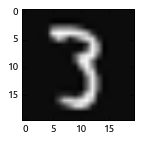

In [7]:
permuter()